In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from collections import Counter
from sklearn.model_selection import train_test_split

In [74]:
from scipy.io import arff
import pandas as pd

data, meta = arff.loadarff('veh-prime.arff')
df = pd.DataFrame(data)
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

In [75]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f27,f28,f29,f30,f31,f32,f33,f34,f35,CLASS
0,0.063,0.160,0.509,-0.967,0.058,0.000,0.874,0.271,1.307,-0.011,...,-0.924,-0.077,0.108,-0.003,0.381,-0.314,0.929,0.184,-0.001,noncar
1,-0.037,-0.325,-0.626,-0.029,0.121,-0.409,-0.002,-0.835,-0.595,-0.253,...,0.270,0.533,0.152,-0.978,0.157,0.011,-0.254,0.453,-0.621,noncar
2,-0.000,1.253,0.833,-0.970,1.516,0.014,-0.378,1.197,0.546,-0.402,...,-0.408,1.550,0.010,-0.652,-0.403,-0.151,0.000,0.049,-0.113,car
3,-0.743,-0.082,-0.626,0.723,-0.006,-0.000,-0.080,-0.297,0.166,0.311,...,0.819,-0.077,-0.099,-0.001,-0.291,1.633,0.686,1.528,-0.000,noncar
4,-0.939,-1.054,-0.140,0.036,-0.766,0.000,-0.272,1.077,5.236,-0.366,...,0.676,0.533,-0.003,0.122,-0.179,-1.449,0.024,-1.698,0.083,noncar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0.072,-0.082,-0.950,0.359,0.311,0.368,-0.259,0.420,0.292,-0.070,...,0.005,0.127,0.380,-0.001,1.388,-0.151,0.291,-0.085,0.000,car
842,-0.555,-0.568,0.184,-0.920,0.121,0.883,-0.006,-0.177,0.546,0.282,...,0.039,-1.093,0.066,0.002,0.829,-0.476,0.924,0.184,0.170,noncar
843,-0.703,1.496,1.481,-0.529,1.199,-0.085,-0.980,1.585,0.673,-0.553,...,-0.704,-0.687,0.059,-0.294,-0.963,-0.314,-0.204,0.722,-0.386,car
844,0.296,-0.932,-1.436,0.113,-0.259,0.905,0.409,-0.685,-0.468,-0.053,...,-0.156,-1.297,-0.238,-0.000,1.388,0.173,0.016,-0.085,0.873,car


# Q2 and Q3

In [76]:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [77]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].replace({'noncar': 0, 'car': 1}).values.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf = KNN(k=7)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# print(predictions)

acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.9117647058823529


In [78]:
def pearson(x, y):
    N = len(x)
    sum_sq_x = np.sum(np.square(x))
    sum_sq_y = np.sum(np.square(y))
    sum_coproduct = np.sum(x * y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    pop_sd_x = np.sqrt((sum_sq_x / N) - (mean_x * mean_x))
    pop_sd_y = np.sqrt((sum_sq_y / N) - (mean_y * mean_y))
    cov_x_y = (sum_coproduct / N) - (mean_x * mean_y)
    
    correlation = cov_x_y / (pop_sd_x * pop_sd_y)
    
    return correlation

In [79]:
correlation = []
for i in range(len(df.columns) - 1):
    correlation.append(pearson(df.iloc[:, i].values, y))

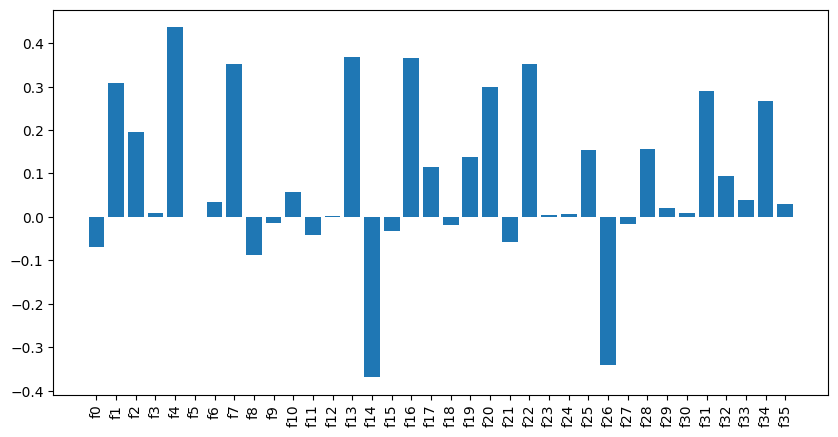

In [80]:
plt.figure(figsize=(10, 5))
plt.bar(df.columns[:-1], correlation)
plt.xticks(rotation=90)
plt.show()

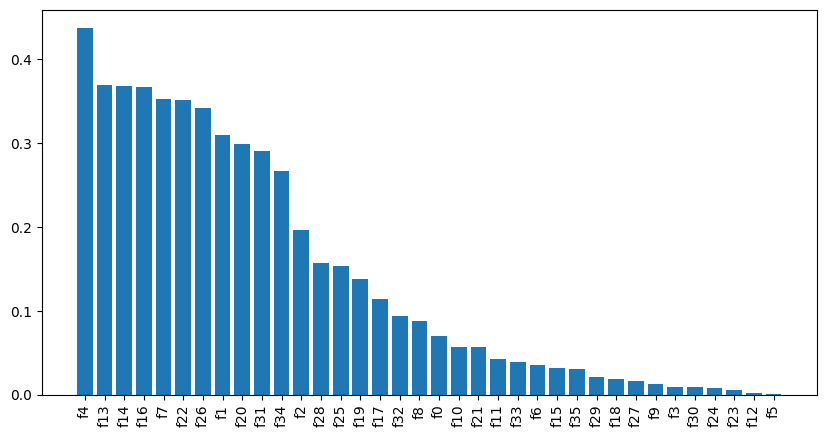

In [81]:
correlation_df = pd.DataFrame({'feature': df.columns[:-1], 'correlation': correlation})

correlation_df.correlation = correlation_df.correlation.abs()
correlation_df = correlation_df.sort_values('correlation', ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(correlation_df['feature'], correlation_df['correlation'])
plt.xticks(rotation=90)
plt.show()

In [82]:
correlation_df.head(7)

,feature,correlation
4,f4,0.436922
13,f13,0.368269
14,f14,0.368224
16,f16,0.366025
7,f7,0.352141
22,f22,0.351350
26,f26,0.341043


/var/folders/_9/qq7pw_fx125c812gfv1wl_180000gn/T/ipykernel_93205/4175279794.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  clf.fit(X_train[:, correlation_df.feature[:i].index], y_train)
/var/folders/_9/qq7pw_fx125c812gfv1wl_180000gn/T/ipykernel_93205/4175279794.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  predictions = clf.predict(X_test[:, correlation_df.feature[:i].index])


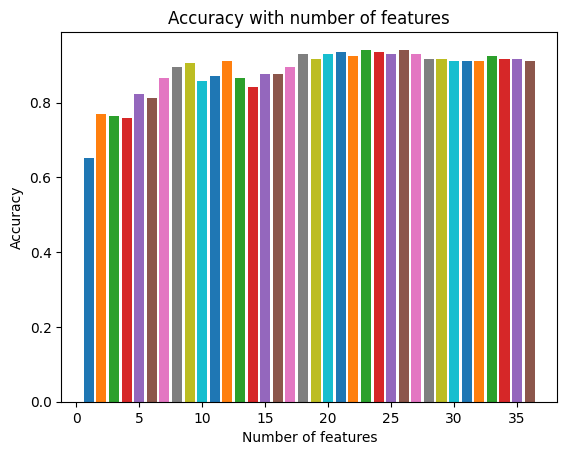

In [83]:
# I want to run my KNN model using LOOCV and add the features one by one to see how the accuracy changes using the features with the highest correlation
# I will start with the feature with the highest correlation and add the next feature with the highest correlation and so on
# I will also plot the accuracy for each feature added
# I will use the KNN model with k=7

accuracies = {}
for i in range(1, len(correlation_df) + 1):
    clf = KNN(k=7)
    clf.fit(X_train[:, correlation_df.feature[:i].index], y_train)
    predictions = clf.predict(X_test[:, correlation_df.feature[:i].index])
    acc = np.sum(predictions == y_test) / len(y_test)
    accuracies[i] = acc

    plt.bar(i, acc)
    plt.xlabel('Number of features')
    plt.ylabel('Accuracy')
    plt.title('Accuracy with number of features')

In [84]:
# get the accuracy for each feature added to the model in a descending order
accuracies_sorted = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))
accuracies_sorted

{23: 0.9411764705882353,
 26: 0.9411764705882353,
 21: 0.9352941176470588,
 24: 0.9352941176470588,
 18: 0.9294117647058824,
 20: 0.9294117647058824,
 25: 0.9294117647058824,
 27: 0.9294117647058824,
 22: 0.9235294117647059,
 33: 0.9235294117647059,
 19: 0.9176470588235294,
 28: 0.9176470588235294,
 29: 0.9176470588235294,
 34: 0.9176470588235294,
 35: 0.9176470588235294,
 12: 0.9117647058823529,
 30: 0.9117647058823529,
 31: 0.9117647058823529,
 32: 0.9117647058823529,
 36: 0.9117647058823529,
 9: 0.9058823529411765,
 8: 0.8941176470588236,
 17: 0.8941176470588236,
 15: 0.8764705882352941,
 16: 0.8764705882352941,
 11: 0.8705882352941177,
 7: 0.8647058823529412,
 13: 0.8647058823529412,
 10: 0.8588235294117647,
 14: 0.8411764705882353,
 5: 0.8235294117647058,
 6: 0.8117647058823529,
 2: 0.7705882352941177,
 3: 0.7647058823529411,
 4: 0.7588235294117647,
 1: 0.6529411764705882}

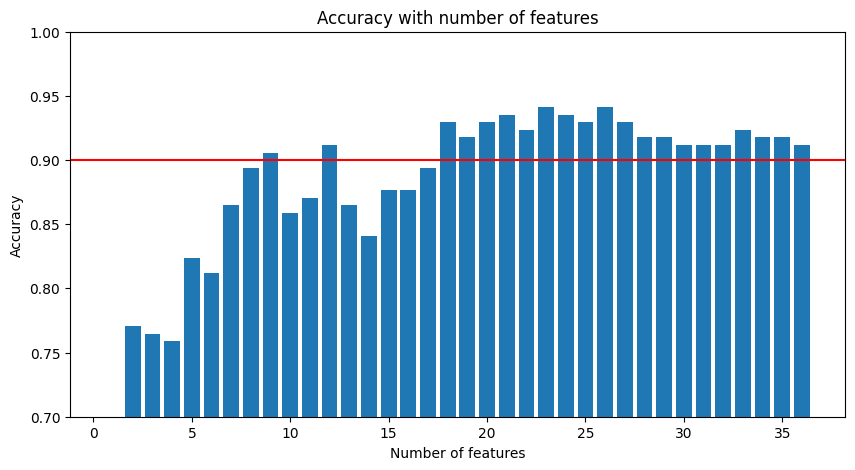

In [85]:
# plot accuracies_sorted in a bar chart to see the accuracy for each feature added and also zoom in to see all the accuracy differences
plt.figure(figsize=(10, 5))
plt.bar(accuracies_sorted.keys(), accuracies_sorted.values())
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Accuracy with number of features')
plt.ylim(0.7, 1)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.show()

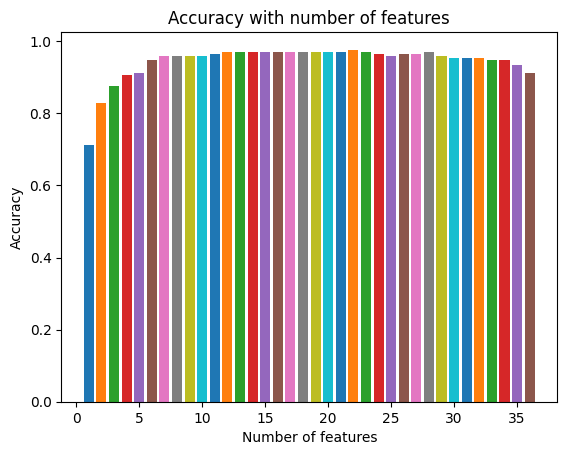

In [86]:
accuracies_greedy = {}
features_greedy = []
X_train_greedy = X_train
X_test_greedy = X_test

for i in range(len(correlation_df)):
    acc = 0
    for j in range(len(correlation_df)):
        if j not in features_greedy:
            clf = KNN(k=7)
            clf.fit(X_train_greedy[:, features_greedy + [j]], y_train)
            predictions = clf.predict(X_test_greedy[:, features_greedy + [j]])
            acc_temp = np.sum(predictions == y_test) / len(y_test)
            if acc_temp > acc:
                acc = acc_temp
                feature = j
    accuracies_greedy[i + 1] = acc
    features_greedy.append(feature)

    plt.bar(i + 1, acc)
    plt.xlabel('Number of features')
    plt.ylabel('Accuracy')
    plt.title('Accuracy with number of features')

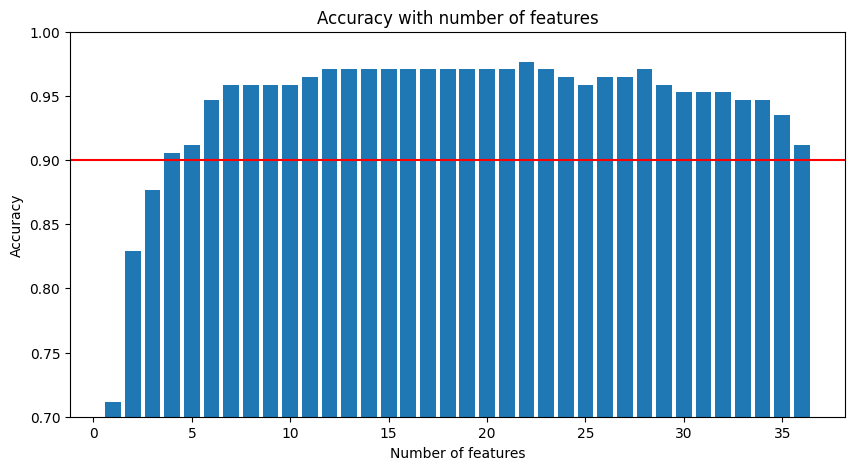

In [87]:
plt.figure(figsize=(10, 5))
plt.bar(accuracies_greedy.keys(), accuracies_greedy.values())
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Accuracy with number of features')
plt.ylim(0.7, 1)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.show()

In [88]:
max_acc_greedy = max(accuracies_greedy.values())
max_acc_greedy_key = max(accuracies_greedy, key=accuracies_greedy.get)
max_acc_greedy_key, max_acc_greedy

(22, 0.9764705882352941)

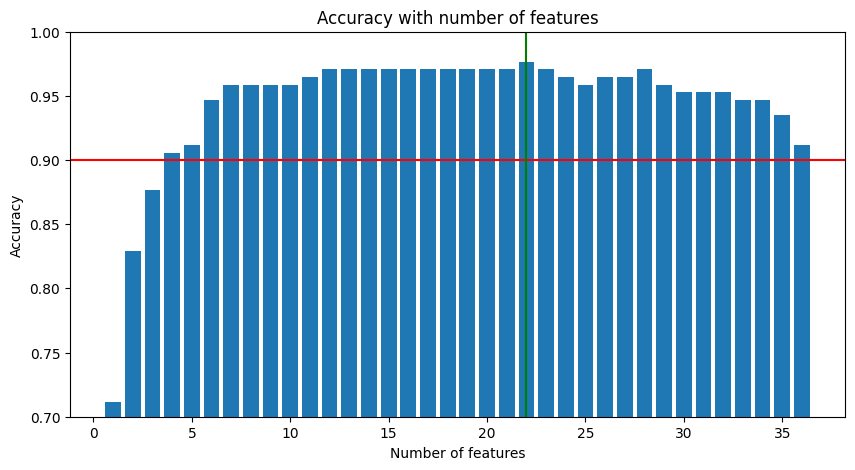

In [89]:
plt.figure(figsize=(10, 5))
plt.bar(accuracies_greedy.keys(), accuracies_greedy.values())
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Accuracy with number of features')
plt.ylim(0.7, 1)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.axvline(x=max_acc_greedy_key, color='g', linestyle='-')
plt.show()

# Q4 Part c

In [108]:
def binary_probability(p, n, k):
    return (np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))) * (p ** k) * ((1 - p) ** (n - k))

p = 0.6
n = 25
k = 13
accuracy = 0

for i in range(k, n + 1):
    accuracy += binary_probability(p, n, i)

print(f'accuracy for a class of 25 students (each 60%): {accuracy * 100:.4f}%')

accuracy for a class of 25 students (each 60%): 84.6232%


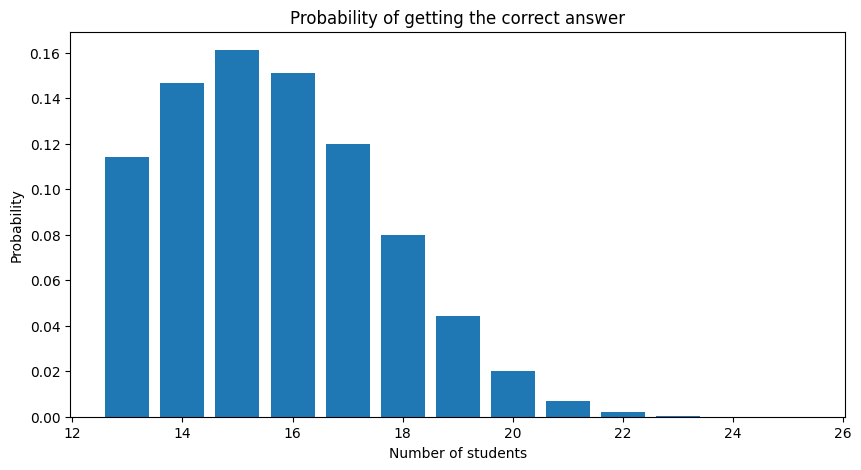

In [104]:
probabilities = [binary_probability(p, n, i) for i in range(13, 26)]
plt.figure(figsize=(10, 5))
plt.bar(range(13, 26), probabilities)
plt.xlabel('Number of students')
plt.ylabel('Probability')
plt.title('Probability of getting the correct answer')
plt.show()

# Q4 Part e

In [109]:
p = 0.45
n = 25
k = 13
accuracy = 0

for i in range(k, n + 1):
    accuracy += binary_probability(p, n, i)

print(f'accuracy for a class of 25 students (each 45%): {accuracy * 100:.4f}%')

accuracy for a class of 25 students (each 45%): 30.6324%


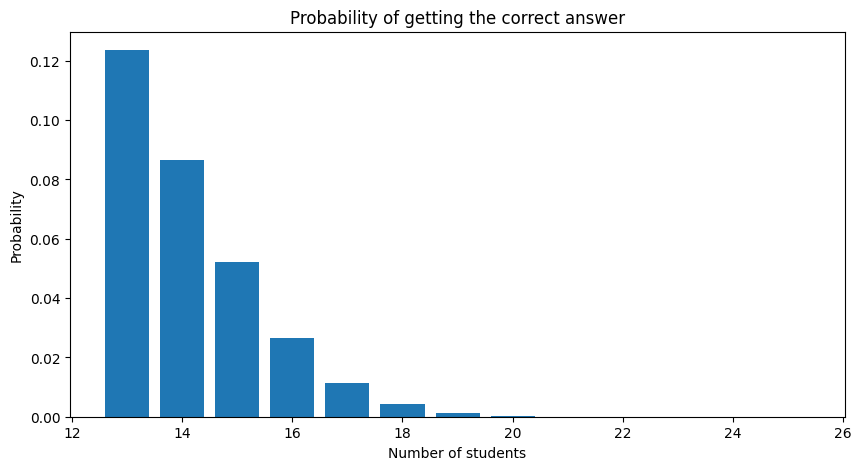

In [110]:
probabilities = [binary_probability(p, n, i) for i in range(13, 26)]
plt.figure(figsize=(10, 5))
plt.bar(range(13, 26), probabilities)
plt.xlabel('Number of students')
plt.ylabel('Probability')
plt.title('Probability of getting the correct answer')
plt.show()